In [1]:
import pandas as pd

import os

import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import anndata as ad
import glob


import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

import json

In [2]:
# Load configuration
with open("../../config/config_notebooks_HER2_with_TNBC_model.json", "r") as config_file:
    config = json.load(config_file)

a = config['retrained_color_palette']

In [3]:
# Retrieve patient names and loop through them
patient_list = [f"TNBC{i}" for i in range(1, 97)]

patients_to_remove = []
for patient in patient_list:
    for model_type, names, benchmark_path in zip([config['retrained_model_list2_type']],
                                  [config['retrained_model_list2']],
                                   [config['retrained_benchmark_folder2']]):
        
        path_to_invasive_cancer_clustering_results = os.path.join(benchmark_path, "invasive_cancer_clustering")
        opti_clusters = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, "kmeans", "optimal_clusters.csv"), index_col=0)

        for name in names:
            # print(opti_clusters.loc[name, 'n_clusters'])
            if os.path.exists(os.path.join(benchmark_path, "invasive_cancer_clustering", "kmeans", name, f"quantized_wasserstein_distance_molecular_combat_corrected_{name}_{opti_clusters.loc[name, 'n_clusters']}_clusters_patient_{patient}.csv")) == False:
                patients_to_remove.append(patient)
                print(name)# print(f"Removed patient {patient} as file does not exist")

# remove all patients in patients_to_remove from patient_list
patients_to_remove_set = set(patients_to_remove)
original_len = len(patient_list)
patient_list = [p for p in patient_list if p not in patients_to_remove_set]
print(f"Removed {original_len - len(patient_list)} patients; remaining {len(patient_list)} patients.")

uni
uni_full_koleo_16384_prototypes
TNBC_uni_full_koleo_4096_prototypes
uni
uni_full_koleo_16384_prototypes
TNBC_uni_full_koleo_4096_prototypes
uni
uni_full_koleo_16384_prototypes
TNBC_uni_full_koleo_4096_prototypes
uni
uni_full_koleo_16384_prototypes
TNBC_uni_full_koleo_4096_prototypes
uni
uni_full_koleo_16384_prototypes
TNBC_uni_full_koleo_4096_prototypes
uni
uni_full_koleo_16384_prototypes
TNBC_uni_full_koleo_4096_prototypes
uni
uni_full_koleo_16384_prototypes
TNBC_uni_full_koleo_4096_prototypes
uni
uni_full_koleo_16384_prototypes
TNBC_uni_full_koleo_4096_prototypes
uni
uni_full_koleo_16384_prototypes
TNBC_uni_full_koleo_4096_prototypes
uni
uni_full_koleo_16384_prototypes
TNBC_uni_full_koleo_4096_prototypes
uni
uni_full_koleo_16384_prototypes
TNBC_uni_full_koleo_4096_prototypes
uni
uni_full_koleo_16384_prototypes
TNBC_uni_full_koleo_4096_prototypes
uni
uni_full_koleo_16384_prototypes
TNBC_uni_full_koleo_4096_prototypes
uni
uni_full_koleo_16384_prototypes
TNBC_uni_full_koleo_4096_pro

In [22]:
optimal_clusters = []
df_all_summary = []
for i_p, patient in enumerate(["B", "C", "D", "E", "F", "G", "H"]):

    df_summary = pd.DataFrame(columns=["n_clusters", 
                                    "wasserstein_distances", 
                                    "mean_wasserstein_distance", 
                                    "std_wasserstein_distance", 
                                    "median_wasserstein_distance", 
                                    "min_wasserstein_distance", 
                                    "max_wasserstein_distance",
                                    "model_type",
                                    "params"])
    summary_list = []
    all_names = []
    wassersteins = []

    for model_type, names, benchmark_path in zip([config['retrained_model_list2_type']],
                                  [config['retrained_model_list2']],
                                   [config['retrained_benchmark_folder2']]):

        
        
        path_to_invasive_cancer_clustering_results = os.path.join(benchmark_path, "invasive_cancer_clustering")
        opti_clusters = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, "kmeans", "optimal_clusters.csv"), index_col=0)
        dfs = []
        optimal_clusters.append(opti_clusters)
        


        for name in names:

            filename = os.path.join(path_to_invasive_cancer_clustering_results, "kmeans", name, f"quantized_wasserstein_distance_molecular_combat_corrected_{name}_{opti_clusters.loc[name, 'n_clusters']}_clusters_patient_{patient}.csv")
            df = pd.read_csv(filename, index_col=0)

            n_clusters = df.shape[0]
            
            # Get the lower triangular part of the matrix without the diagonal values
            lower_matrix = df.where(np.tril(np.ones(df.shape), k=-1).astype(bool))
            wasserstein_distances = lower_matrix.stack().values
            wassersteins.append(wasserstein_distances)


            mean_wasserstein_distance = np.mean(wasserstein_distances)
            std_wasserstein_distance = np.std(wasserstein_distances)
            median_wasserstein_distance = np.median(wasserstein_distances)

            min_wasserstein_distance = np.min(wasserstein_distances)
            max_wasserstein_distance = np.max(wasserstein_distances)

            if name == "uni":
                params = "base"
            else:
                params = "_".join(name.split("_")[2:])

            summary_list.append({"n_clusters": n_clusters, 
                                "wasserstein_distances": wasserstein_distances, 
                                "mean_wasserstein_distance": mean_wasserstein_distance, 
                                "std_wasserstein_distance": std_wasserstein_distance, 
                                "median_wasserstein_distance": median_wasserstein_distance, 
                                "min_wasserstein_distance": min_wasserstein_distance, 
                                "max_wasserstein_distance": max_wasserstein_distance,
                                "model_type": model_type, 
                                "params": params})
            


            dfs.append(df)
            all_names.append(name)


    df_summary = pd.concat([df_summary, pd.DataFrame(summary_list)], ignore_index=True)
    df_summary.index = all_names
    df_summary['patient'] = patient
    df_all_summary.append(df_summary)




    df_sink = pd.DataFrame(wassersteins, index=all_names).T
    df_sink_melted = df_sink.melt(var_name="model", value_name="wasserstein_distance")
    df_sink_melted['model_type'] = df_sink_melted['model'].apply(lambda x: x.split("_")[1] if len(x.split("_")) > 1 else "uni")
    df_sink_melted['param'] = df_sink_melted['model'].apply(lambda x: "_".join(x.split("_")[2:]) if len(x.split("_")) > 2 else "base")

df_spider = pd.concat(df_all_summary).reset_index().rename(columns={"index": "model"})


In [23]:
df_spider

,model,n_clusters,wasserstein_distances,mean_wasserstein_distance,std_wasserstein_distance,median_wasserstein_distance,min_wasserstein_distance,max_wasserstein_distance,model_type,params,patient
0,uni,6,"[2342.092529296875, 584.3369140625, 2860.94042...",6150.557601,5936.205643,2860.940430,584.336914,15710.877930,full,base,B
1,uni_full_koleo_16384_prototypes,3,"[13322.845007363094, 17844.701610395106, 19455...",16874.456757,2596.072428,17844.701610,13322.845007,19455.823654,full,koleo_16384_prototypes,B
2,TNBC_uni_full_koleo_4096_prototypes,6,"[9587.842782315332, 8796.587695312495, 14924.6...",12157.626931,4389.719738,13387.601820,3376.461803,19637.301092,full,full_koleo_4096_prototypes,B
3,uni,6,"[563.6602783203125, 786.6141357421875, 985.454...",5411.901257,4718.507065,2756.720459,563.660278,13552.773438,full,base,C
4,uni_full_koleo_16384_prototypes,3,"[13181.17727366418, 6666.915503046035, 14988.9...",11612.337025,3573.968608,13181.177274,6666.915503,14988.918297,full,koleo_16384_prototypes,C
5,TNBC_uni_full_koleo_4096_prototypes,6,"[2102.871747653062, 1441.0185445228271, 2489.0...",6514.985488,4453.424462,4380.921982,1441.018545,14180.278986,full,full_koleo_4096_prototypes,C
6,uni,7,"[1043.962854693517, 575.4037795075662, 701.733...",6624.979736,4734.209778,6341.069624,575.403780,16836.443115,full,base,D
7,uni_full_koleo_16384_prototypes,5,"[3026.0892523539146, 1420.4897931894586, 3903....",9066.915848,4768.362410,10075.611545,1420.489793,18300.263121,full,koleo_16384_prototypes,D
8,TNBC_uni_full_koleo_4096_prototypes,6,"[5518.572232423392, 12931.898849461655, 12679....",10582.910878,3608.504561,11174.402218,5343.182151,18139.684272,full,full_koleo_4096_prototypes,D
9,uni,7,"[698.3903319068762, 5293.973704224998, 5853.16...",9941.117943,5791.343129,8060.409180,698.390332,21277.385091,full,base,E


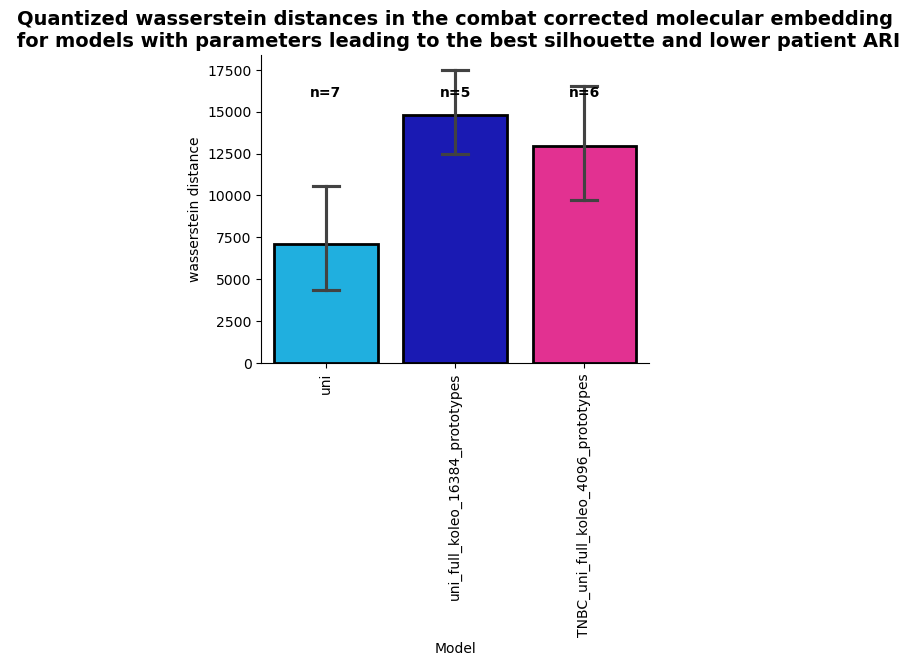

In [24]:

plt.figure(figsize=(5, 4))
sns.barplot(data=df_spider, x='model', y="median_wasserstein_distance",
            palette=config["retrained_color_palette"], 
            linewidth=2,
            edgecolor="black",
            capsize=0.2,
)
plt.xticks(rotation=90)
plt.ylabel("wasserstein distance")
plt.xlabel("Model")
plt.title(f"Quantized wasserstein distances in the combat corrected molecular embedding\n for models with parameters leading to the best silhouette and lower patient ARI", weight="bold", fontsize=14)
sns.despine()

for i, n in enumerate(df_spider['model'].unique()):
    plt.text(x=i, y=15700, s=f"n={opti_clusters.loc[n, 'n_clusters']}", ha='center', va='bottom', weight='bold')

plt.savefig(os.path.join(config['figures_folder'], "Figure4/invasive_cancer_clustering_quantized_wasserstein_distances_molecular_combat_corrected_embedding_for_clusters_defined_with_best_silhouette_and_lower_ARI_patient.pdf"), bbox_inches="tight")